4 qubits, 1 for each binary to get decimal 1-15
Apply H gate then measure
Put the collapsed qubits into the binary to get decimal random number

Random binary: 1101 -> decimal 13


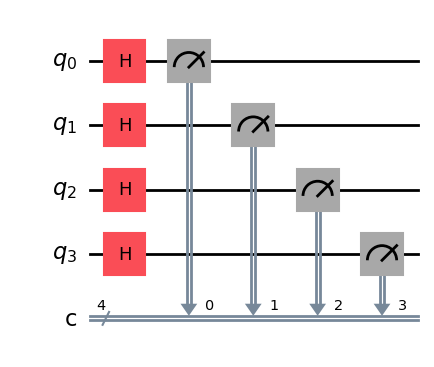

In [1]:
# Build and sample the 4-qubit random circuit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

qc = QuantumCircuit(4, 4) #4 qubits, 4 classical bits(to store the collapsed qubits)
qc.h([0, 1, 2, 3]) #apply H gate to all qubits
qc.measure([0, 1, 2, 3], [0, 1, 2, 3]) #measure each qubit and store in classical bits

sim = Aer.get_backend('aer_simulator') #simulated qc to run on instead of ibm server
compiled = transpile(qc, sim) #compile the qc for the simulator
result = sim.run(compiled, shots=1).result() #run qc once and get result
counts = result.get_counts() #giving measured results
binary = next(iter(counts.keys())) #get the binary string from the counts
decimal = int(binary, 2) #convert binary string to decimal
print(f"Random binary: {binary} -> decimal {decimal}") #print
qc.draw('mpl')


For fun, quantum coin flip (true randomness unlike in classical computing where they simulate randomness)

In [44]:
# Build and sample the 1-qubit random circuit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

qc = QuantumCircuit(1, 1) #1 qubits, 1 classical bit(the coin)
qc.h([0]) #apply H gate to all qubits
qc.measure([0], [0]) #measure each qubit and store in classical bits
sim = Aer.get_backend('aer_simulator') #simulated qc to run on instead of ibm server
compiled = transpile(qc, sim) #compile the qc for the simulator
result = sim.run(compiled, shots=1).result() #run qc once and get result
counts = result.get_counts() #giving measured results
binary = next(iter(counts.keys())) #get the binary string from the counts
decimal = int(binary, 2) #convert binary string to decimal
if decimal == 1:
    print("Tails")
else:
    print("Heads")



Heads
